In [1]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


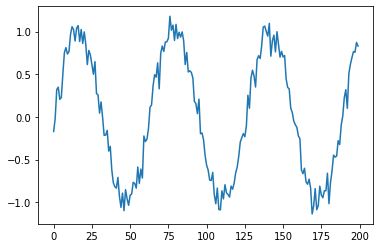

In [39]:
#Make the original data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)* 0.1 #the last part adds the noise.

#plot it
plt.plot(series)
plt.show()

In [40]:
##build the dataset
#Let's see if we can use T past values to predict the next value
T=10
X=[]
Y=[]

for t in range(len(series) -T):
  x= series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X= np.array(X).reshape(-1,T)
Y= np.array(Y)
N=len(X)
print('X shape', X.shape,'Y.shape', Y.shape)


X shape (190, 10) Y.shape (190,)


In [41]:
  ## try autoregressive linear model
  i= Input(shape=(T,))
  x= Dense(1)(i)
  model = Model(i,x)
  model.compile(
      loss='mse',
      optimizer=Adam(lr=0.1),
  )
  #train the RNN  
  r = model.fit(
      X[:-N//2], Y[:-N//2],
      epochs = 80,
      validation_data = (X[-N//2:], Y[-N//2:]),
  )

Epoch 1/80
3/3 [==============================] - 0s 27ms/step - loss: 0.2297 - val_loss: 0.1871
Epoch 2/80
3/3 [==============================] - 0s 7ms/step - loss: 0.1135 - val_loss: 0.0953
Epoch 3/80
3/3 [==============================] - 0s 6ms/step - loss: 0.1243 - val_loss: 0.0345
Epoch 4/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0507 - val_loss: 0.0619
Epoch 5/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0590 - val_loss: 0.0608
Epoch 6/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0643 - val_loss: 0.0663
Epoch 7/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0434 - val_loss: 0.0405
Epoch 8/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0517 - val_loss: 0.0304
Epoch 9/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0363 - val_loss: 0.0356
Epoch 10/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0370 - val_loss: 0.0305
Epoch 11/80
3/3 [=====================

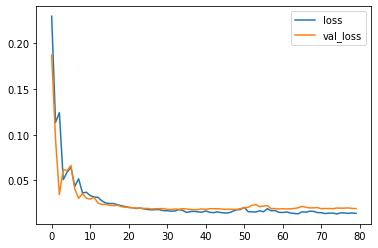

In [42]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [43]:
#'Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predicitons = []

#index of first validation input
i= -N//2

while len(validation_predicitons) < len(validation_target):
  p= model.predict(X[i].reshape(1,-1))[0,0] # 1x1 array -> scalar
  i +=1

  #update the prediction list
  validation_predicitons.append(p)

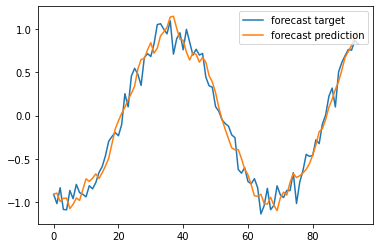

In [45]:
plt.plot(validation_target, label= 'forecast target')
plt.plot(validation_predicitons, label= 'forecast prediction')
plt.legend()

#This looks perfectly correct but this was the wrong way to do it. When we add noise
#We will see how it diverges.

In [46]:
#Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predicitons = []

#last train input
last_x = X[-N//2] #1-D array of length T

while len(validation_predicitons) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1x1 array -> scalar

  #update the predictions list
  validation_predicitons.append(p)

  #make the new input
  last_x = np.roll(last_x, -1) #roll function shifts all values to left with 1 index. So now we will add over new data to the end of our last_x
  last_x[-1] = p

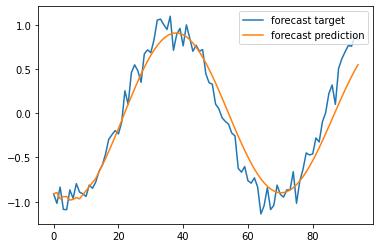

In [47]:
plt.plot(validation_target, label= 'forecast target')
plt.plot(validation_predicitons, label= 'forecast prediction')
plt.legend()

#Now with correct prediction we got better predictions.